<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px
            ">
<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
 Payam Amanat


</p>

</div>

<center>
<img src="https://vaghayerooz.com/files/fa/news/1400/1/16/49565_738.jpg" width=800 height=500 />
</center>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff; text-align:center"><b>Notebook- </b> Abstraction </h2>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

💡In this project we will use of different methods of Regression . <br>

💡The objective of this project is prediction of house price in different parts of Tehran(The capital of Iran) . <br>
</div>

<a id="7.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff; text-align:center"><b>Notebook- </b> Content  </h2>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914  ">

💡 Basic Understanding of Dataset<br >

💡 Exploratory Data Analysis (EDA)<br>

💡 Feature Engineering <br>

💡 Data Preprocessing<br>

💡 Model Building<br>

💡 Model Performance Check<br>

💡 Model Hyper Parameter Tunning<br>

💡 Saving model <br>

</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Importing Libraries
</p>
</div>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re 
import time
import joblib
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.precision', 8)
sns.set(style="darkgrid",font_scale=1.5)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV , KFold
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge , ElasticNet , Lasso
from sklearn.ensemble import RandomForestRegressor  , AdaBoostRegressor 
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Dataset
</p>
</div>

In [8]:
dataset = pd.read_csv(r'C:\Users\payama\Desktop\dataset\tehran house price\housePrice.csv')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Dataset
</p>
</div>

### 1: Shape of our Dataset :

In [9]:
print(f'The shape of our dataset is : {dataset.shape}')

The shape of our dataset is : (3479, 8)


### 2: Columns of Dataset :

In [10]:
print('Columns of dataset are :')
dataset.columns

Columns of dataset are :


Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

### 3 : view of Dataset

In [11]:
dataset.head(7)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000.0,61666.67
1,60,1,True,True,True,Shahran,1850000000.0,61666.67
2,79,2,True,True,True,Pardis,550000000.0,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000.0,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000.0,233333.33
5,70,2,True,True,False,North Program Organization,2050000000.0,68333.33
6,87,2,True,True,True,Pardis,600000000.0,20000.00


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Description**<br>
* As it can be seen two columns(Price & Price(USD)) are the same ,so we use Price column as our y .<br>

</div>

### 4 :  Checking Duplicates Dataset

In [12]:
print(f'Number of Duplicated in our datase is : {dataset.duplicated().sum()}')
print(f'The percentage of Duplicated in our dataset is : {round(dataset.duplicated().sum() * 100 / len(dataset),1)}')

Number of Duplicated in our datase is : 208
The percentage of Duplicated in our dataset is : 6.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* So there are a verity of data which have duplicated .<br>
* We will use of **Data Lekage** methods to solve this problem.<br>
</div>

### 5 : checking the  Dataset types

In [13]:
print("The types of our features in Dataset are : ")
dataset.dtypes

The types of our features in Dataset are : 


Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Except Area feature , all of them have right type . we have to change its type later .<br>

</div>

### 6 : Cheking the total missing values and percentage  in our Dataset

In [14]:
missing_values=dataset.isnull().sum().to_frame().rename(columns={0:'Missing values'})
missing_values["Percentage of missing values"]  = round((dataset.isnull().sum() * 100)/len(dataset) , 1)
missing_values

,Missing values,Percentage of missing values
Area,0,0.0
Room,0,0.0
Parking,0,0.0
Warehouse,0,0.0
Elevator,0,0.0
Address,23,0.7
Price,0,0.0
Price(USD),0,0.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Due to Address feature plays an important role and it must be exact , we cant replace missing values with anything .<br>
* Consequently , we will drop those missing values later

</div>

### 7 : Checking the cardinality of categorical feature

In [15]:
print(f'The cardinality of categorical feature is : {dataset.Address.nunique()}')

The cardinality of categorical feature is : 192


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* it has somehow high cardinality , but as I said it is important feature , so we use of this feature .<br>
* because of high cardinality we cant show this feature on chart


</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### 1 : checking Price feature (y)

Text(0.5, 1.0, 'Price Distribution')

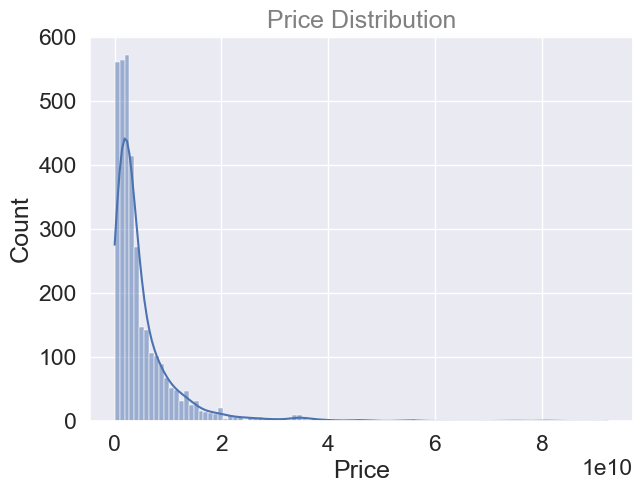

In [16]:
plt.figure(figsize=(7,5))
sns.histplot(x=dataset["Price"] , kde=True , palette='Set2' ,bins=100)
plt.title('Price Distribution' , color='gray')

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* As it can be seen , Price feature is **Right-Skewed**.<br>
* most houses have roughly close price in one third of the first part
* Outliers are obvious now

</div>

### 2 : Checking the number of rooms

Text(0.5, 1.0, 'Number of Rooms')

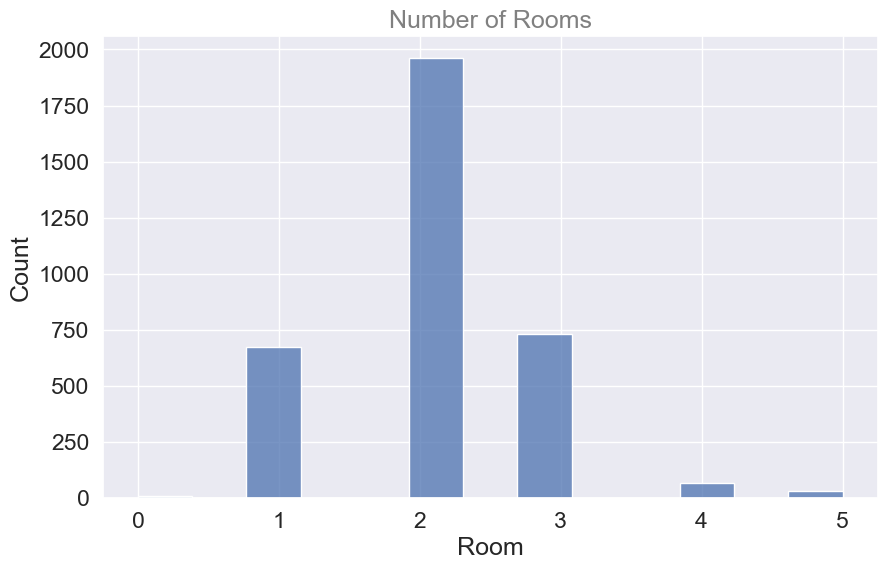

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(dataset["Room"] , palette='Set2' )
plt.title("Number of Rooms" , color='gray')

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* About 2000 houses have exactly 2 rooms (most houses) 
* Distribution of 1 and 3 rooms are roughly the same (a little more 3 rooms)
* we have not many houses with 4 or 5 rooms (in total about 150 houses)
* houses without room is rarely seen 

**Conclusion**
* Mean of rooms is roughly 2.
* best learning is for two , three and one  rooms (in row)
</div>

### 3: Checking Boolean features

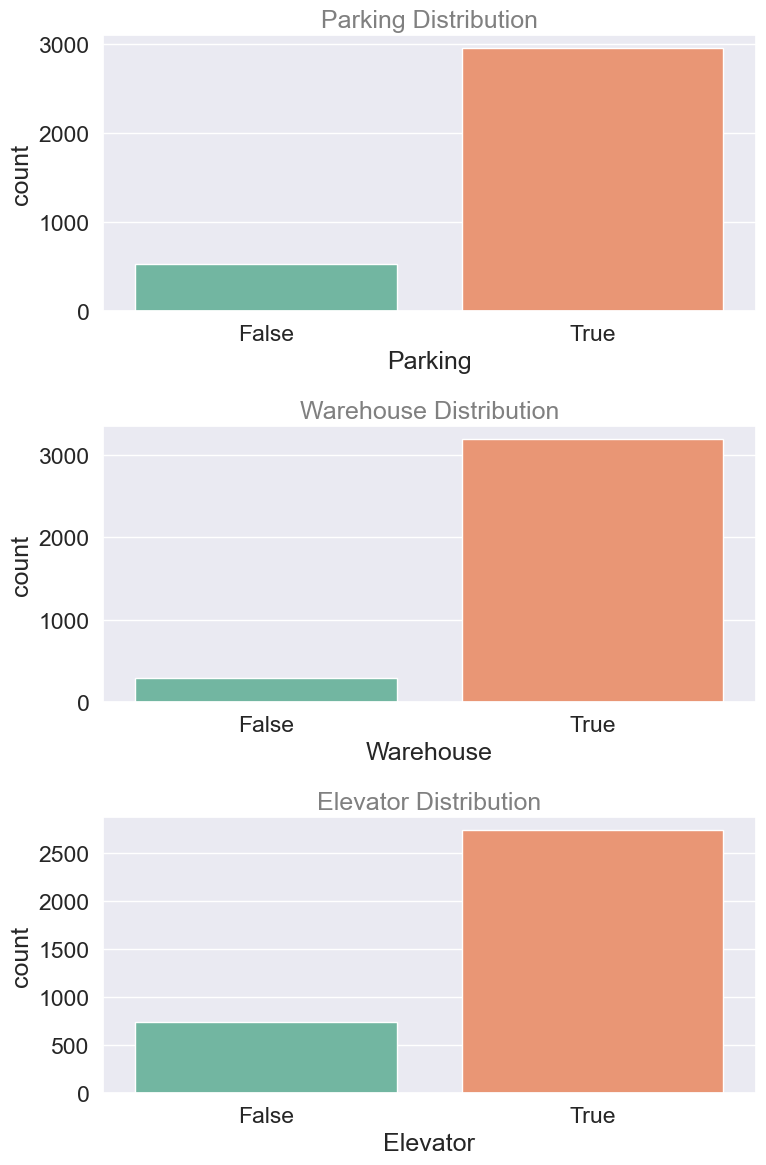

In [18]:
boolean_cols = ['Parking', 'Warehouse', 'Elevator']
plt.figure(figsize=(8,12))
for inx , col in enumerate(boolean_cols):
    plt.subplot(3,1,inx+1)
    sns.countplot(x=col,data=dataset , palette='Set2')
    plt.title(f'{col} Distribution' , color='gray')
    plt.tight_layout()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Most houses have Parking , Warehouse and Elevator (all these three features )
* Most houses have Warehouse.(houses without warehouse are very low)
* Those houses without Parking and Elevator have the same distribution(less than 1000 more than 500)


</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Feature Engineering
</p>
</div>

### 1 : Change the type of Area

In [19]:
dataset.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

The type of Area must be changed if we want to show and do feature engineering .<br>

To be possible to change its type we need to remove comma between numbers than we are capable changing its type.


</div>

In [20]:
dataset["Area"]=dataset["Area"].apply(lambda x : re.sub(',' , '', x))
dataset["Area"]=pd.to_numeric(dataset["Area"])

In [21]:
dataset.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

### 2 : Dividing Area feaure to a new feature

In [22]:
dataset.Area.describe()

count    3.47900000e+03
mean     8.74399984e+06
std      3.16726629e+08
min      3.00000000e+01
25%      6.90000000e+01
50%      9.00000000e+01
75%      1.20000000e+02
max      1.61600000e+10
Name: Area, dtype: float64

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

we are going to divide Area feature to 4 category : Low - Average-under-mean - Average-upper-mean - High <br>

except these features other will be nan values


</div>

In [23]:
Area_new_feature = []

for i in dataset['Area']:
    if i <= 30:
        Area_new_feature.append("small")

    elif (i > 30 and i<=90):
        Area_new_feature.append("AveUnderMean")

    elif (i>90 and i <= 120):
        Area_new_feature.append("AveUpperMean")

    elif i > 120:
        Area_new_feature.append("High")
    else:
            Area_new_feature.append(np.nan)

dataset["AreaSize"] = Area_new_feature


In [24]:

keys=['Average_under_mean', 'vast', 'Average_upper_mean', 'Small']

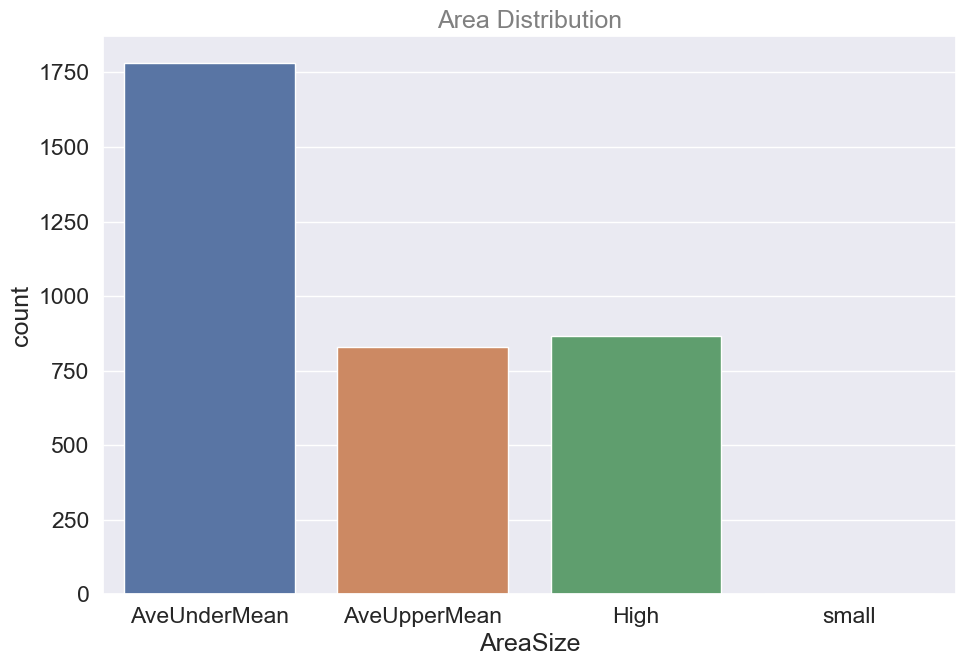

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(x="AreaSize" , data= dataset)
plt.title("Area Distribution" , color='gray')
# plt.xticks(["30-90" , "90-120" , 'upper 90'  , 'under 30'],keys)
plt.tight_layout()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* As we can see  about half of houses have between 30-90 meters(m2)
* Houses with 90-120 meters  have the same contribution with houses which have more than 120 meters
* we can realize that right-skewed has happened.(outliers most are on the right part)
* very low houeses are with less than 30 meters size.

</div>

### 3 : Dividing Price feaure to a new feature

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

we are going to determine 4 level for this feature : Cheap , AveUnderMean , AveUpperMean , Expensive <br>

cheap : 0-25% <br>

AveUnderMean : 25%-50% <br>

AveUpperMean : 50%-75% <br>

Expensive : upper 75%

</div>

In [26]:
Price_new_feature = []

H25 = dataset['Price'].describe()[4]
H50 = dataset['Price'].describe()[5]
H75 = dataset['Price'].describe()[6]

for i in dataset['Price']:

    if    i <= H25:
        Price_new_feature.append("Cheap")

    elif (i > H25 and i<= H50):
        Price_new_feature.append("AveUnderMean")

    elif (i > H50 and i <= H75):
       Price_new_feature.append("AveUpperMean")

    elif  i > H75:
        Price_new_feature.append("Expensive")

    else:
        Price_new_feature.append(np.nan)

dataset["PriceLevel"] = Price_new_feature

<AxesSubplot:xlabel='PriceLevel', ylabel='count'>

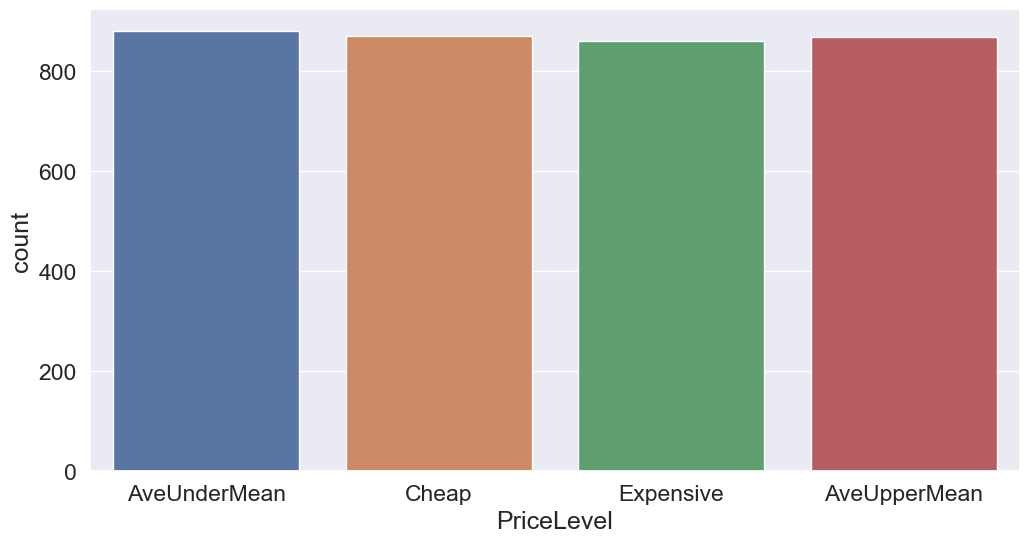

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='PriceLevel' , data = dataset )

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

We have very balanced distribution in 4 parts

</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

In [28]:
dataset.sample(7)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
529,65,1,True,True,False,Saadat Abad,3250000000.0,108333.33,AveUnderMean,AveUpperMean
135,70,2,False,True,True,Bahar,1200000000.0,40000.00,AveUnderMean,Cheap
870,75,2,False,True,True,Parand,389000000.0,12966.67,AveUnderMean,Cheap
539,103,2,True,True,True,Saadat Abad,5200000000.0,173333.33,AveUpperMean,AveUpperMean
1640,90,2,True,True,True,Golestan,690000000.0,23000.00,AveUnderMean,Cheap
1131,63,1,True,True,True,Ostad Moein,1280000000.0,42666.67,AveUnderMean,Cheap
2247,50,1,False,True,False,Baghestan,410000000.0,13666.67,AveUnderMean,Cheap


### 1 : Discover Missing values

In [29]:
missing_values=dataset.isnull().sum().to_frame().rename(columns={0:'Missing values'})
missing_values["Percentage of missing values"]  = round((dataset.isnull().sum() * 100)/len(dataset) , 1)
print(f'Total of missing values : {dataset.isnull().sum().sum()}')
missing_values.style.highlight_max(color="red")


Total of missing values : 23


,Missing values,Percentage of missing values
Area,0,0.000000
Room,0,0.000000
Parking,0,0.000000
Warehouse,0,0.000000
Elevator,0,0.000000
Address,23,0.700000
Price,0,0.000000
Price(USD),0,0.000000
AreaSize,0,0.000000
PriceLevel,0,0.000000


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

As I said above , because Address (location of house) is crucial , wa cant replace missing values with like(most frequent) <br>
(if we do that our model doesnt have good prediction) <br>
So , we easily drop those missing values
</div>

In [30]:
dataset.dropna(inplace=True)

In [31]:
print(f'Total missing values : {dataset.isnull().sum().sum()}')

Total missing values : 0


### 2 : Discover duplicated values

In [32]:
duplicated_values = dataset[dataset.duplicated()]
print(f'The Number of Duplicated values : {len(duplicated_values)}')
print(f'The Percentage of Duplicated values : {round(len(duplicated_values )/ len(dataset)* 100)}%')

The Number of Duplicated values : 208
The Percentage of Duplicated values : 6%


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

We have 208 duplicated values .
We can easily drop them

</div>

In [33]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(inplace=True)
dataset.drop('index',axis=1,inplace=True)
dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63,1,True,True,True,Shahran,1850000000.0,61666.67,AveUnderMean,AveUnderMean
1,60,1,True,True,True,Shahran,1850000000.0,61666.67,AveUnderMean,AveUnderMean
2,79,2,True,True,True,Pardis,550000000.0,18333.33,AveUnderMean,Cheap
3,95,2,True,True,True,Shahrake Qods,902500000.0,30083.33,AveUpperMean,Cheap
4,123,2,True,True,True,Shahrake Gharb,7000000000.0,233333.33,High,Expensive


In [34]:
print(f"The new shape of Dataset is : {dataset.shape}")

The new shape of Dataset is : (3248, 10)


In [35]:
dataset.dtypes

Area            int64
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
AreaSize       object
PriceLevel     object
dtype: object

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* About dtypes every thing is fine . <br>
* we are going to check and discover each feature 
</div>

In [36]:
AreaSize_feature = dataset["AreaSize"].value_counts().to_frame()
AreaSize_feature["AreaSizeMean"] = round(dataset.groupby('AreaSize')["Price"].mean())
AreaSize_feature.sort_values('AreaSize' , ascending=False)

,AreaSize,AreaSizeMean
AveUnderMean,1644,2027991180.0
High,823,13569665371.0
AveUpperMean,780,4218685769.0
small,1,500000000.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Obviously with increasing the meter of a house the price will raise and Mean will be raised too . <br>

* Distribution of houses according to Meter is : AveUnderMean - High - AveUpperMean - Small 

* There is just a house with a small size.(it's an outlier)
</div>

In [37]:
room_feature = round(dataset["Room"].value_counts(normalize=True) * 100 ).to_frame()
room_feature["MeanPrice"] = round(dataset.groupby('Room')["Price"].mean())
room_feature.sort_index()

,Room,MeanPrice
0,0.0,8715555556.0
1,19.0,1717831520.0
2,56.0,3363038373.0
3,21.0,11043108790.0
4,2.0,25681220588.0
5,1.0,33734393939.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

We can see the distribution of houses with :   <br>
In row 2 , 3 , 1 , 4 , 5   and 0 rooms have the highest distribution. <br>

Mean price for each has been shown. <br>
Obviously, with raising the number of rooms the cost will be increased.<br>
(Duplicate the cost for each 1 room  (except 4rooms to 5rooms)

</div>

In [38]:
Parking_feature =dataset["Parking"].value_counts().to_frame()
Parking_feature["ParkingMean"] = round(dataset.groupby("Parking")["Price"].mean())
Parking_feature

,Parking,ParkingMean
True,2745,6162136357.0
False,503,1745253877.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* As we can see , most houses have parking (about 5.5x versus those without parking)<br>

* Those houses with parking have higher costs.(about fourfold)(transparently Parking is an important feature for price) 


</div>

In [39]:
Warehouse_feature =dataset["Warehouse"].value_counts().to_frame()
Warehouse_feature["WarehouseMean"] = round(dataset.groupby("Warehouse")["Price"].mean())
Warehouse_feature

,Warehouse,WarehouseMean
True,2969,5753694139.0
False,279,2545552330.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Most houses have Warehouse (about 10x versus those without Warehouse)

* Houses with warehouse have higher costs . more than duoble

</div>

In [40]:
Elevator_feature =dataset["Elevator"].value_counts().to_frame()
Elevator_feature["ElevatorMean"] = round(dataset.groupby("Elevator")["Price"].mean())
Elevator_feature

,Elevator,ElevatorMean
True,2551,5952952019.0
False,697,3740238737.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Most houses have Elevator (about 4x versus those without Elevator)

* Houses with Elevator have higher costs .about 1.5X 

* versus Parking and Warehouse  , Elevator has less influence on price

</div>

In [41]:
pd.crosstab(dataset["Parking"],dataset["Room"] )

Room,0,1,2,3,4,5
Parking,,,,,,
False,7,233,233,24,1,5
True,2,392,1586,670,67,28


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Most houses with 1 room or more have Parking.
* With raising the number of rooms , houses with Parking have increasingly raised.


</div>

In [42]:
round(dataset.groupby(["Parking" , "Warehouse"])["Price"].mean().to_frame())

Price
Parking Warehouse              
False   False      2488762703.0
        True       1312709434.0
True    False      2657319149.0
        True       6286411279.0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* It can be seen that houses with Warehouse and without Parking have less cost versus those houses with Parking.
* If both features exist in a house , the cost of the house will be high.


</div>

In [43]:
round(dataset.groupby(["Room" , "Warehouse"])["Price"].mean().to_frame())

Price
Room Warehouse               
0    False      19120750000.0
     True         391400000.0
1    False       1376319608.0
     True        1784436138.0
2    False       1811027972.0
     True        3495459308.0
3    False       7692475000.0
     True       11142534125.0
4    False       3673333333.0
     True       26696969231.0
5    False       9927857143.0
     True       40143846154.0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* Except houses without room , with increasing the number of Rooms and Warehouse existance the cost will be increasingly raised.


</div>

### Discover and prepare Address feature


In [44]:
dataset["Address"].unique()

array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Velenjak', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Pakdasht', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Baghestan', 'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Dorous', 'Sadeghieh', 'Chahardangeh', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'P

In [45]:
len(dataset["Address"].unique())

192

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

Because we dont know that all names of addresses  have correct writing or human mistake has happened or not, we are going to 
remove any probable  problem in case of existance.
</div>

In [46]:
dataset["Address"]=dataset["Address"].apply(lambda x : re.sub('[^a-zA-Z]' ,'' ,x))
dataset["Address"].head().to_frame()

,Address
0,Shahran
1,Shahran
2,Pardis
3,ShahrakeQods
4,ShahrakeGharb


In [47]:
len(dataset["Address"].unique())

192

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Top ten Addresses  with the highest repeat
</div>

In [48]:
Address_most_repeat=dataset["Address"].value_counts().head(10)

Text(0, 0.5, 'Address')

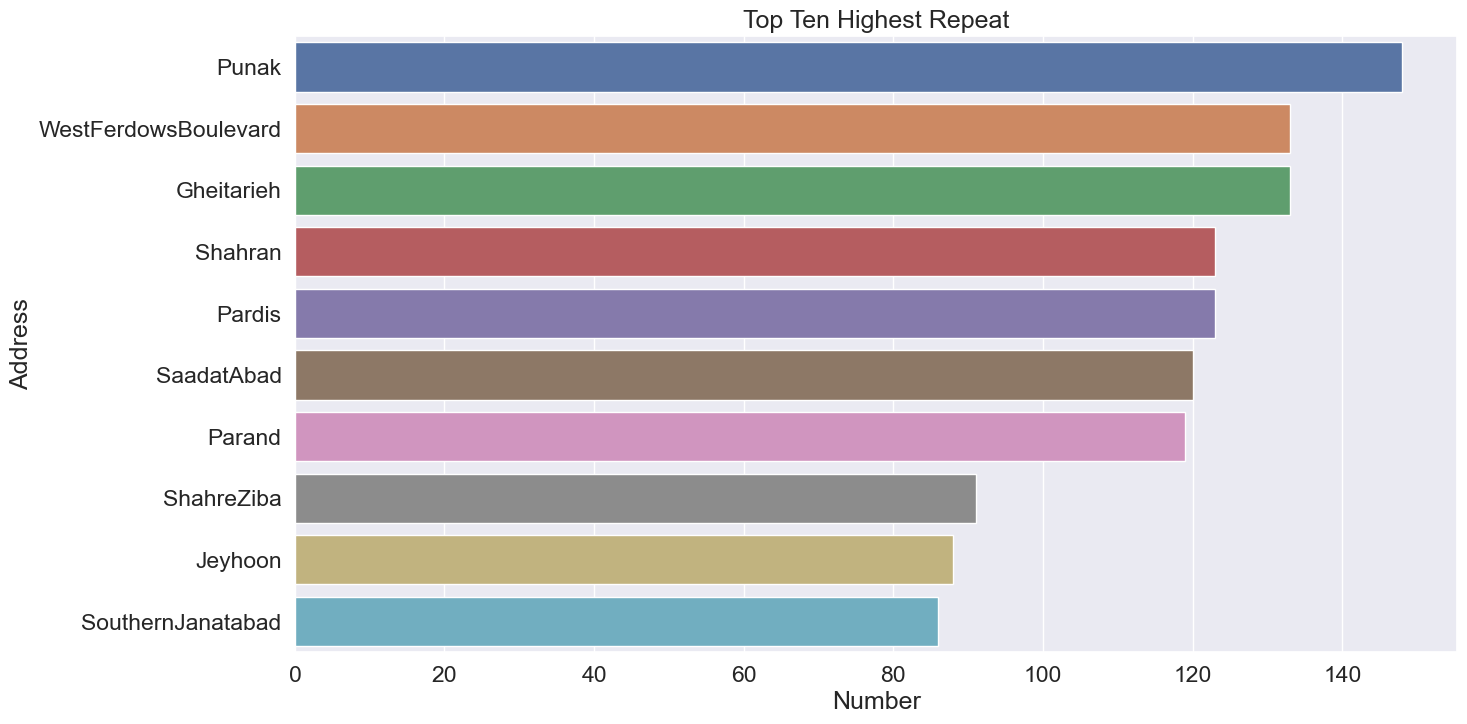

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(x=Address_most_repeat.values , y=Address_most_repeat.index)
plt.title('Top Ten Highest Repeat')
plt.xlabel('Number')
plt.ylabel("Address")

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Top ten Addresses  with the most expensive mean price
</div>

In [50]:
Address_feature=round(dataset.groupby('Address')["Price"].mean().to_frame())
Address_Top_Ten_Expensive =Address_feature.sort_values("Price",ascending=False).head(10)
Address_Top_Ten_Expensive

,Price
Address,
Gandhi,70000000000.0
Lavasan,48000000000.0
Mahmoudieh,33466666667.0
Vanak,32700000000.0
Elahieh,26786352941.0
Argentina,25165000000.0
Zaferanieh,23575148148.0
Velenjak,21381363636.0
Farmanieh,20665803571.0


### Arranging and Statistical review for price feature

In [51]:
round(dataset["Price"].describe()).to_frame()

,Price
count,3248.0
mean,5478117919.0
std,8267916004.0
min,3600000.0
25%,1420000000.0
50%,2977500000.0
75%,6200000000.0
max,92400000000.0


In [52]:
dataset_regular = dataset.copy()
dataset_regular ["Price"]=dataset_regular ["Price"].map('{:,.0f}'.format)
dataset_regular ["Price(USD)"]=dataset_regular ["Price(USD)"].map('{:,.0f}'.format)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* we create new variable to avoid changing the type of Price from numeric to object .
* Price and Price(USD) are easily readable now . 
</div>

In [53]:
dataset_regular.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63,1,True,True,True,Shahran,"1,850,000,000","61,667",AveUnderMean,AveUnderMean
1,60,1,True,True,True,Shahran,"1,850,000,000","61,667",AveUnderMean,AveUnderMean
2,79,2,True,True,True,Pardis,"550,000,000","18,333",AveUnderMean,Cheap
3,95,2,True,True,True,ShahrakeQods,"902,500,000","30,083",AveUpperMean,Cheap
4,123,2,True,True,True,ShahrakeGharb,"7,000,000,000","233,333",High,Expensive


### Quick visualising 

<AxesSubplot:>

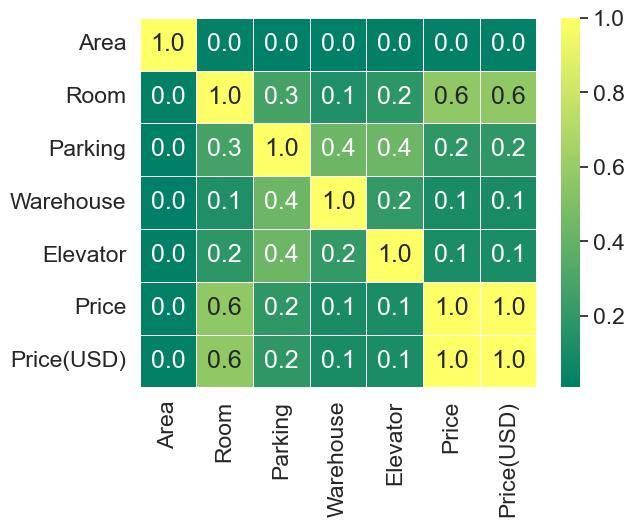

In [54]:
sns.heatmap(dataset.corr(),annot=True , cmap="summer" ,fmt='.1f' , linewidths=.5)

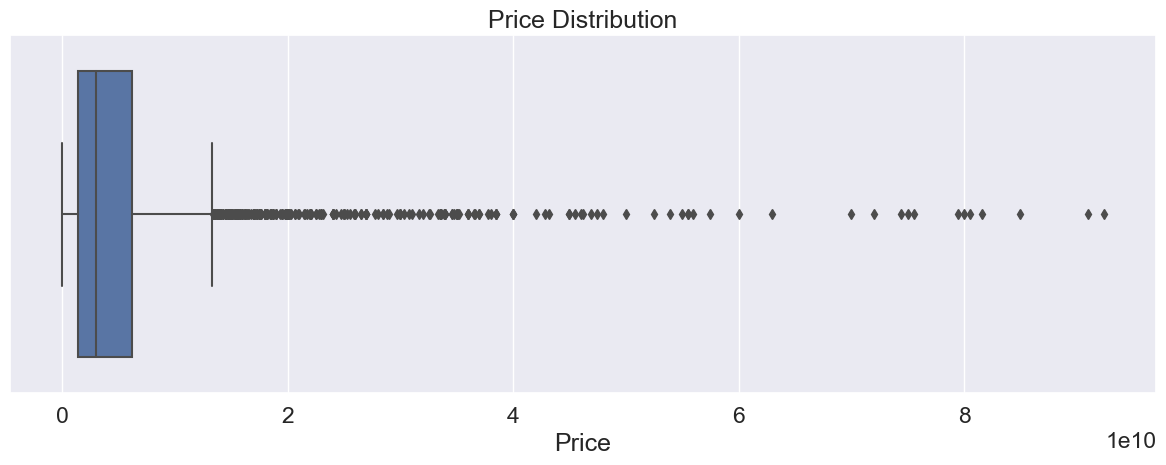

In [55]:
plt.figure(figsize=(12,5))
sns.boxplot(x=dataset["Price"])
plt.title('Price Distribution')
plt.tight_layout()

In [56]:
dataset.skew()

Area          42.48756230
Room           0.63961595
Parking       -1.90889078
Warehouse     -2.95696183
Elevator      -1.39103722
Price          4.72779323
Price(USD)     4.72779322
dtype: float64

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

What are outliers in dataset ?

Answer : Outliers are values at the extreme ends of a dataset.

One of the best method to find out outliers : **Interquartile range method** 

Interquartile range method:

1: Sort your data from low to high<br>
2: Identify the first quartile (Q1), the median, and the third quartile (Q3).<br>
3: Calculate your IQR = Q3 – Q1<br>
4: Calculate your upper fence = Q3 + (1.5 * IQR)<br>
5: Calculate your lower fence = Q1 – (1.5 * IQR)<br>
6: Use your fences to highlight any outliers, all values that fall outside your fences.<br>
7: Your outliers are any values greater than your upper fence or less than your lower fence.<br>

</div>

In [57]:
# part 1-5
def Interquartile_Range(df , target):

    Q1 = np.percentile(df[target] , 25)
    Q3 = np.percentile(df[target] , 75)

    IQR = Q3-Q1
    
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)

    print(f'The Upper_Fence for {target} is : {Upper_Fence}')
    print(f'The Lower_Fence for {target} is : {Lower_Fence}')


In [58]:
Interquartile_Range(df=dataset , target="Price")
print("--"*20)
Interquartile_Range(df=dataset , target='Area')

The Upper_Fence for Price is : 13370000000.0
The Lower_Fence for Price is : -5750000000.0
----------------------------------------
The Upper_Fence for Area is : 200.0
The Lower_Fence for Area is : -8.0


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* It must be considered that most outliers are on the right side dut to **Right_skewed** <br>
so , we need to remove outliers on the right(Upper_Fence)

* Among all the features , two of them have noticeable effect : **Area** and **Price** <br>
We cant find out outliers from  (Room , Parking , Warehouse ,Elevator) features.<br>
It's better to find out outliers first from Price , second Area
</div>

In [59]:
# part 6
PriceUpperFence =  13370000000
AreaUpperFence  = 200
Price_UpperFence_Data =  np.where(dataset["Price"] > PriceUpperFence)
Area_UpperFence_Data  =  np.where(dataset["Area"] > AreaUpperFence)

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* We can use of a method and add all the Outliers which are greater than UpperFence for both Price and Area and then <br>
eliminate them from our Dataset(but in a new variable)
</div>

In [60]:
# part 7
Price_Area_Outliers =np.union1d(Price_UpperFence_Data , Area_UpperFence_Data)
print(f'The length of Outliers is : {len(Price_Area_Outliers)} ')
print(f'The percentage of OUtliers is : {round(len(Price_Area_Outliers)/len(dataset)*100)}%')
dataset_regular.iloc[Price_Area_Outliers].head()

The length of Outliers is : 319 
The percentage of OUtliers is : 10%


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
25,160,3,True,True,True,Velenjak,"14,945,000,000","498,167",High,Expensive
57,215,3,True,True,True,Pakdasht,"1,750,000,000","58,333",High,AveUnderMean
76,300,3,True,True,False,Baghestan,"1,500,000,000","50,000",High,AveUnderMean
94,130,2,True,True,True,Dorous,"16,900,000,000","563,333",High,Expensive
138,150,3,True,True,True,SaadatAbad,"20,000,000,000","666,667",High,Expensive


### Creating a new variable without Outliers

In [61]:
Dataset_Without_Outliers = dataset.drop(Price_Area_Outliers)
print(f'The shape of prepared Dataset is : {Dataset_Without_Outliers.shape}')
Dataset_Without_Outliers.head()


The shape of prepared Dataset is : (2929, 10)


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
0,63,1,True,True,True,Shahran,1850000000.0,61666.67,AveUnderMean,AveUnderMean
1,60,1,True,True,True,Shahran,1850000000.0,61666.67,AveUnderMean,AveUnderMean
2,79,2,True,True,True,Pardis,550000000.0,18333.33,AveUnderMean,Cheap
3,95,2,True,True,True,ShahrakeQods,902500000.0,30083.33,AveUpperMean,Cheap
4,123,2,True,True,True,ShahrakeGharb,7000000000.0,233333.33,High,Expensive


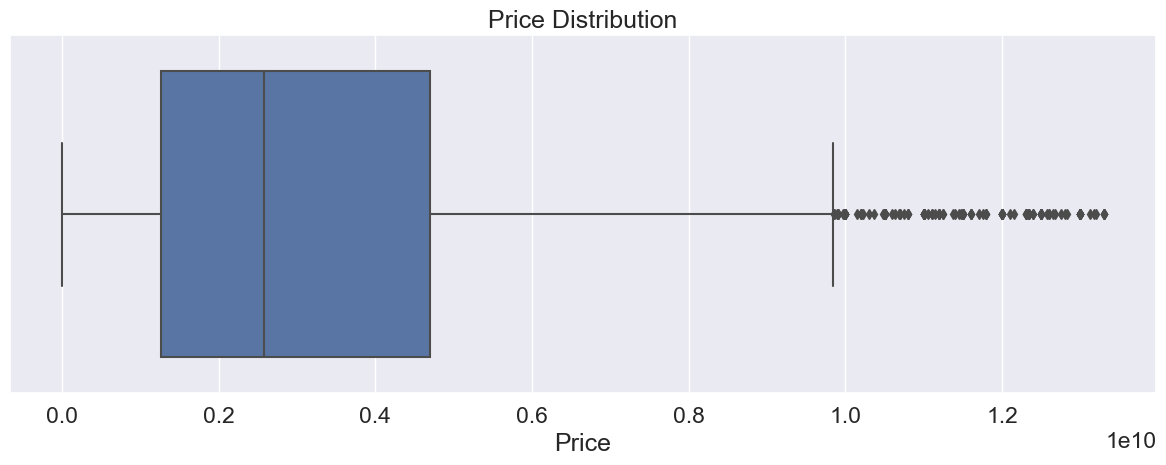

In [62]:
plt.figure(figsize=(12,5))
sns.boxplot(x=Dataset_Without_Outliers["Price"])
plt.title('Price Distribution')
plt.tight_layout()

In [63]:
Dataset_Without_Outliers.skew()

Area          0.77160451
Room          0.20109521
Parking      -1.78045440
Warehouse    -2.87856093
Elevator     -1.38505943
Price         1.30185413
Price(USD)    1.30185413
dtype: float64

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* Now we have more balanced data and its ready to be used for fitting.
* Due to we have dropped lots of data from dataset we can use of both(with outliers and without) to check the 
accuracy for each one .
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building 
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* We will convert Boolean features to numeric to prepare them for our model.
</div>

In [64]:
boolean_features = ['Parking', 'Warehouse', 'Elevator']
dataset[boolean_features]=dataset[boolean_features].astype(int)
dataset.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel
3243,63,1,1,1,0,FeizGarden,1890000000.0,63000.00,AveUnderMean,AveUnderMean
3244,86,2,1,1,1,SouthernJanatabad,3500000000.0,116666.67,AveUnderMean,AveUpperMean
3245,83,2,1,1,1,Niavaran,6800000000.0,226666.67,AveUnderMean,Expensive
3246,105,2,1,1,1,Dorous,5600000000.0,186666.67,AveUpperMean,AveUpperMean
3247,82,2,0,1,1,Parand,360000000.0,12000.00,AveUnderMean,Cheap


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* We will convert Categorical features to numeric to prepare them for our model(using dummy).
* Creating a new variable named data and save new changes into that variable.
* Actually, with convering categorical features(specially Address feature), we are creating somehow a  **Sparse Matrix**.
</div>

In [65]:
categoriacl_features = pd.get_dummies(dataset[["Address",'AreaSize' , "PriceLevel"]])
dataset=dataset.merge(categoriacl_features , left_index=True , right_index=True)
dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),AreaSize,PriceLevel,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,Address_Afsarieh,Address_Ahang,Address_Airforce,Address_Ajudaniye,Address_AlborzComplex,Address_AliabadSouth,Address_AmirBahador,Address_Amirabad,Address_Amirieh,Address_Andisheh,Address_Aqdasieh,Address_Araj,Address_Argentina,Address_Atabak,Address_Azadshahr,Address_Azarbaijan,Address_Azari,Address_Baghestan,Address_Bahar,Address_Baqershahr,Address_Beryanak,Address_Boloorsazi,Address_CentralJanatabad,Address_Chahardangeh,Address_Chardangeh,Address_Chardivari,Address_Chidz,Address_Damavand,Address_Darabad,Address_Darakeh,Address_Darband,Address_DaryanNo,Address_DehkadeOlampic,Address_Dezashib,Address_Dolatabad,Address_Dorous,Address_EastFerdowsBoulevard,Address_EastPars,Address_Ekbatan,Address_Ekhtiarieh,Address_Elahieh,Address_ElmoSanat,Address_Enghelab,Address_Eram,Address_Eskandari,Address_Fallah,Address_Farmanieh,Address_Fatemi,Address_FeizGarden,Address_Firoozkooh,Address_FiroozkoohKuhsar,Address_Gandhi,Address_GardenofSaba,Address_Gheitarieh,Address_Ghiyamdasht,Address_Ghoba,Address_Gholhak,Address_Gisha,Address_Golestan,Address_HaftTir,Address_Hakimiyeh,Address_Hashemi,Address_HassanAbad,Address_Hekmat,Address_Heravi,Address_Heshmatieh,Address_HorSquare,Address_Islamshahr,Address_IslamshahrElahieh,Address_Javadiyeh,Address_Jeyhoon,Address_Jordan,Address_Kahrizak,Address_Kamranieh,Address_Karimkhan,Address_Karoon,Address_Kazemabad,Address_KeshavarzBoulevard,Address_KhademabadGarden,Address_Khavaran,Address_Komeil,Address_Koohsar,Address_Kook,Address_Lavasan,Address_Lavizan,Address_Mahallati,Address_Mahmoudieh,Address_Majidieh,Address_Malard,Address_Marzdaran,Address_Mehrabad,Address_MehrabadRiverRiver,Address_Mehran,Address_Mirdamad,Address_MirzaShirazi,Address_Moniriyeh,Address_Narmak,Address_NasimShahr,Address_Nawab,Address_Naziabad,Address_Nezamabad,Address_Niavaran,Address_NorthProgramOrganization,Address_NorthernChitgar,Address_NorthernJanatabad,Address_NorthernSuhrawardi,Address_NorthrenJamalzadeh,Address_OstadMoein,Address_Ozgol,Address_Pakdasht,Address_PakdashtKhatunAbad,Address_Parand,Address_Parastar,Address_Pardis,Address_Pasdaran,Address_PersianGulfMartyrsLake,Address_Pirouzi,Address_Pishva,Address_Punak,Address_Qalandari,Address_Qarchak,Address_QasrodDasht,Address_QazvinImamzadehHassan,Address_Railway,Address_Ray,Address_RayMontazeri,Address_RayPilgosh,Address_Razi,Address_Republic,Address_RobatKarim,Address_Rudhen,Address_SaadatAbad,Address_SabaShahr,Address_Sabalan,Address_Sadeghieh,Address_Safadasht,Address_Salehabad,Address_Salsabil,Address_Sattarkhan,Address_SeyedKhandan,Address_Shadabad,Address_Shahedshahr,Address_ShahrAra,Address_ShahrakeApadana,Address_ShahrakeAzadi,Address_ShahrakeGharb,Address_ShahrakeMadaen,Address_ShahrakeQods,Address_ShahrakeQuds,Address_ShahrakeShahidBagheri,Address_ShahrakehNaft,Address_Shahran,Address_ShahreZiba,Address_Shahryar,Address_ShamsAbad,Address_Shoosh,Address_SiMetriJi,Address_Sohanak,Address_SouthernChitgar,Address_SouthernJanatabad,Address_SouthernProgramOrganization,Address_SouthernSuhrawardi,Address_Tajrish,Address_Tarasht,Address_Taslihat,Address_TehranNow,Address_Tehransar,Address_Telecommunication,Address_Tenant,Address_ThirteenNovember,Address_Vahidieh,Address_Vahidiyeh,Address_Valiasr,Address_Vanak,Address_VaraminBeheshti,Address_Velenjak,Address_Villa,Address_WaterOrganization,Address_Waterfall,Address_WestFerdowsBoulevard,Address_WestPars,Address_Yaftabad,Address_Yakhchiabad,Address_YousefAbad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,AreaSize_AveUnderMean,AreaSize_AveUpperMean,AreaSize_High,AreaSize_small,PriceLevel_AveUnderMean,PriceLevel_AveUpperMean,PriceLevel_Cheap,PriceLevel_Expensive
0,63,1,1,1,1,Shahran,1850000000.0,61666.67,AveUnderMean,AveUnderMean,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

* We will drop all the features which we dont need them(we have already converted them to the numeric features).
* **Price(USD)** is just an additional feature and to avoid **redundancy** we drop it.
* Creating a new variable named prepared_dataset and save the last  changes into that variable.
</div>

In [66]:
prepared_dataset = dataset.drop(["Address",'AreaSize' , "PriceLevel" , "Price(USD)"],axis=1)
prepared_dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Address_Abazar,Address_Abbasabad,Address_Absard,Address_Abuzar,Address_Afsarieh,Address_Ahang,Address_Airforce,Address_Ajudaniye,Address_AlborzComplex,Address_AliabadSouth,Address_AmirBahador,Address_Amirabad,Address_Amirieh,Address_Andisheh,Address_Aqdasieh,Address_Araj,Address_Argentina,Address_Atabak,Address_Azadshahr,Address_Azarbaijan,Address_Azari,Address_Baghestan,Address_Bahar,Address_Baqershahr,Address_Beryanak,Address_Boloorsazi,Address_CentralJanatabad,Address_Chahardangeh,Address_Chardangeh,Address_Chardivari,Address_Chidz,Address_Damavand,Address_Darabad,Address_Darakeh,Address_Darband,Address_DaryanNo,Address_DehkadeOlampic,Address_Dezashib,Address_Dolatabad,Address_Dorous,Address_EastFerdowsBoulevard,Address_EastPars,Address_Ekbatan,Address_Ekhtiarieh,Address_Elahieh,Address_ElmoSanat,Address_Enghelab,Address_Eram,Address_Eskandari,Address_Fallah,Address_Farmanieh,Address_Fatemi,Address_FeizGarden,Address_Firoozkooh,Address_FiroozkoohKuhsar,Address_Gandhi,Address_GardenofSaba,Address_Gheitarieh,Address_Ghiyamdasht,Address_Ghoba,Address_Gholhak,Address_Gisha,Address_Golestan,Address_HaftTir,Address_Hakimiyeh,Address_Hashemi,Address_HassanAbad,Address_Hekmat,Address_Heravi,Address_Heshmatieh,Address_HorSquare,Address_Islamshahr,Address_IslamshahrElahieh,Address_Javadiyeh,Address_Jeyhoon,Address_Jordan,Address_Kahrizak,Address_Kamranieh,Address_Karimkhan,Address_Karoon,Address_Kazemabad,Address_KeshavarzBoulevard,Address_KhademabadGarden,Address_Khavaran,Address_Komeil,Address_Koohsar,Address_Kook,Address_Lavasan,Address_Lavizan,Address_Mahallati,Address_Mahmoudieh,Address_Majidieh,Address_Malard,Address_Marzdaran,Address_Mehrabad,Address_MehrabadRiverRiver,Address_Mehran,Address_Mirdamad,Address_MirzaShirazi,Address_Moniriyeh,Address_Narmak,Address_NasimShahr,Address_Nawab,Address_Naziabad,Address_Nezamabad,Address_Niavaran,Address_NorthProgramOrganization,Address_NorthernChitgar,Address_NorthernJanatabad,Address_NorthernSuhrawardi,Address_NorthrenJamalzadeh,Address_OstadMoein,Address_Ozgol,Address_Pakdasht,Address_PakdashtKhatunAbad,Address_Parand,Address_Parastar,Address_Pardis,Address_Pasdaran,Address_PersianGulfMartyrsLake,Address_Pirouzi,Address_Pishva,Address_Punak,Address_Qalandari,Address_Qarchak,Address_QasrodDasht,Address_QazvinImamzadehHassan,Address_Railway,Address_Ray,Address_RayMontazeri,Address_RayPilgosh,Address_Razi,Address_Republic,Address_RobatKarim,Address_Rudhen,Address_SaadatAbad,Address_SabaShahr,Address_Sabalan,Address_Sadeghieh,Address_Safadasht,Address_Salehabad,Address_Salsabil,Address_Sattarkhan,Address_SeyedKhandan,Address_Shadabad,Address_Shahedshahr,Address_ShahrAra,Address_ShahrakeApadana,Address_ShahrakeAzadi,Address_ShahrakeGharb,Address_ShahrakeMadaen,Address_ShahrakeQods,Address_ShahrakeQuds,Address_ShahrakeShahidBagheri,Address_ShahrakehNaft,Address_Shahran,Address_ShahreZiba,Address_Shahryar,Address_ShamsAbad,Address_Shoosh,Address_SiMetriJi,Address_Sohanak,Address_SouthernChitgar,Address_SouthernJanatabad,Address_SouthernProgramOrganization,Address_SouthernSuhrawardi,Address_Tajrish,Address_Tarasht,Address_Taslihat,Address_TehranNow,Address_Tehransar,Address_Telecommunication,Address_Tenant,Address_ThirteenNovember,Address_Vahidieh,Address_Vahidiyeh,Address_Valiasr,Address_Vanak,Address_VaraminBeheshti,Address_Velenjak,Address_Villa,Address_WaterOrganization,Address_Waterfall,Address_WestFerdowsBoulevard,Address_WestPars,Address_Yaftabad,Address_Yakhchiabad,Address_YousefAbad,Address_Zafar,Address_Zaferanieh,Address_Zargandeh,Address_Zibadasht,AreaSize_AveUnderMean,AreaSize_AveUpperMean,AreaSize_High,AreaSize_small,PriceLevel_AveUnderMean,PriceLevel_AveUpperMean,PriceLevel_Cheap,PriceLevel_Expensive
0,63,1,1,1,1,1850000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
prepared_dataset.dtypes

Area                                     int64
Room                                     int64
Parking                                  int32
Warehouse                                int32
Elevator                                 int32
Price                                  float64
Address_Abazar                           uint8
Address_Abbasabad                        uint8
Address_Absard                           uint8
Address_Abuzar                           uint8
Address_Afsarieh                         uint8
Address_Ahang                            uint8
Address_Airforce                         uint8
Address_Ajudaniye                        uint8
Address_AlborzComplex                    uint8
Address_AliabadSouth                     uint8
Address_AmirBahador                      uint8
Address_Amirabad                         uint8
Address_Amirieh                          uint8
Address_Andisheh                         uint8
Address_Aqdasieh                         uint8
Address_Araj 

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* Creating our X and y (X all features except Price)
* Converting them to test and train 
</div>

In [68]:
X = prepared_dataset.drop(["Price"],axis=1)
y = prepared_dataset["Price"]

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>
* We dont need to use of StandardScaler or any normelizition method due to :
Our X features dont need to be scaled.

</div>

In [69]:
# standard = StandardScaler()
# X = standard.fit_transform(X)

In [70]:
X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size=.2 , random_state=0)

### showing the shape of Train and Test for both X , y 

In [71]:
print("X Train and Test shape :")
print(f'X_train : {X_train.shape}')
print(f'X_test  : {X_test.shape}')
print("---" * 10)
print("y Train and Test shape :")
print(f'y_train : {y_train.shape}')
print(f'y_test  : {y_test.shape}')

X Train and Test shape :
X_train : (2598, 205)
X_test  : (650, 205)
------------------------------
y Train and Test shape :
y_train : (2598,)
y_test  : (650,)


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building 
</div>

In [72]:
Model_Name  = []
Train_Score = []
Test_Score  = []
MSE_Score   = []
RMSE_Score  = []
Time_Score  = []

In [73]:
def model_prediction(model):
    
    start_time = time.time()
    model.fit(X_train , y_train)
    y_prediction = model.predict(X_test)
    TrainScore = model.score(X_train , y_train)
    TestScore = model.score(X_test , y_test)
    MSEscore = mean_squared_error(y_test , y_prediction)
    RMSEscore = np.sqrt(MSEscore)
    end_time = time.time()
    Timescore = end_time - start_time
    
    Name = str(model).split('(')[0]
    Model_Name.append(Name)
    Train_Score.append(TrainScore)
    Test_Score.append(TestScore)
    MSE_Score.append(MSEscore)
    RMSE_Score.append(RMSEscore)
    Time_Score.append(Timescore)

    print(f'Name of the model is : {Name}')
    print('----'*10)
    print(f'R2 score for Training : {TrainScore} ')
    print(f'R2 score for Testing : {TestScore} ')
    print("----" * 10)
    print(f'The MSE score is: {MSEscore}')
    print(f'The RMSE score is: {RMSEscore}')
    print("----" * 10)
    print(f'Time score is: {Timescore}')


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Ridge </b> Model</h2>

In [74]:
model_prediction(Ridge())

Name of the model is : Ridge
----------------------------------------
R2 score for Training : 0.6432934519657532 
R2 score for Testing : 0.5097661922208818 
----------------------------------------
The MSE score is: 3.8719147507694666e+19
The RMSE score is: 6222471173.713436
----------------------------------------
Time score is: 0.03971982002258301


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Lasso </b> Model</h2>

In [75]:
model_prediction(Lasso())

Name of the model is : Lasso
----------------------------------------
R2 score for Training : 0.6540331564603861 
R2 score for Testing : 0.44460930842767055 
----------------------------------------
The MSE score is: 4.386530216838621e+19
The RMSE score is: 6623088567.155523
----------------------------------------
Time score is: 0.5138580799102783


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. ElasticNet </b> Model</h2>

In [76]:
model_prediction(ElasticNet())

Name of the model is : ElasticNet
----------------------------------------
R2 score for Training : 0.40575840299303445 
R2 score for Testing : 0.398347505827816 
----------------------------------------
The MSE score is: 4.751910476300997e+19
The RMSE score is: 6893410241.891162
----------------------------------------
Time score is: 0.04078078269958496


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. LinearRegression </b> Model</h2>

In [77]:
model_prediction(LinearRegression())

Name of the model is : LinearRegression
----------------------------------------
R2 score for Training : 0.6540331564603119 
R2 score for Testing : 0.44437768580703463 
----------------------------------------
The MSE score is: 4.388359595039841e+19
The RMSE score is: 6624469484.449182
----------------------------------------
Time score is: 0.07703733444213867


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. DecisionTreeRegressor </b> Model</h2>

In [78]:
model_prediction(DecisionTreeRegressor())

Name of the model is : DecisionTreeRegressor
----------------------------------------
R2 score for Training : 0.9929028591543528 
R2 score for Testing : 0.49312748574791077 
----------------------------------------
The MSE score is: 4.003328888277192e+19
The RMSE score is: 6327186490.279223
----------------------------------------
Time score is: 0.052660465240478516


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. RandomForestRegressor </b> Model</h2>

In [79]:
model_prediction(RandomForestRegressor())

Name of the model is : RandomForestRegressor
----------------------------------------
R2 score for Training : 0.9641429401278987 
R2 score for Testing : 0.8081195825824661 
----------------------------------------
The MSE score is: 1.5154903778433337e+19
The RMSE score is: 3892929973.4818425
----------------------------------------
Time score is: 1.417184829711914


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. KNeighborsRegressor </b> Model</h2>

In [80]:
model_prediction(KNeighborsRegressor())

Name of the model is : KNeighborsRegressor
----------------------------------------
R2 score for Training : 0.7251591616240536 
R2 score for Testing : 0.5968502320322464 
----------------------------------------
The MSE score is: 3.1841164534024684e+19
The RMSE score is: 5642797580.458179
----------------------------------------
Time score is: 0.22050833702087402


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>9. LGBMRegressor</b> Model</h2>

In [81]:
model_prediction(LGBMRegressor())

Name of the model is : LGBMRegressor
----------------------------------------
R2 score for Training : 0.8507838092281415 
R2 score for Testing : 0.7778399816768047 
----------------------------------------
The MSE score is: 1.7546416390041459e+19
The RMSE score is: 4188844278.5619826
----------------------------------------
Time score is: 0.17327618598937988


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>10. AdaBoostRegressor </b> Model</h2>

In [82]:
model_prediction(AdaBoostRegressor())

Name of the model is : AdaBoostRegressor
----------------------------------------
R2 score for Training : 0.8143087083108012 
R2 score for Testing : 0.770374913163737 
----------------------------------------
The MSE score is: 1.813601483128716e+19
The RMSE score is: 4258640021.331594
----------------------------------------
Time score is: 0.3061988353729248


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>11. XGBRegressor </b> Model</h2>

In [83]:
model_prediction(XGBRegressor())

Name of the model is : XGBRegressor
----------------------------------------
R2 score for Training : 0.9879136414552715 
R2 score for Testing : 0.7752558496474906 
----------------------------------------
The MSE score is: 1.7750513675121904e+19
The RMSE score is: 4213135848.1684284
----------------------------------------
Time score is: 0.8654205799102783


### Checking all models Score 

In [84]:
chart_df = pd.DataFrame({'Algorithms':Model_Name,
            'Train':Train_Score , 
            'Test':Test_Score , 
            'MSE' :MSE_Score,
            'RMSE':RMSE_Score,
            'Time':Time_Score })

In [85]:
chart_df

,Algorithms,Train,Test,MSE,RMSE,Time
0,Ridge,0.64329345,0.50976619,3.87191475e+19,6.22247117e+09,0.03971982
1,Lasso,0.65403316,0.44460931,4.38653022e+19,6.62308857e+09,0.51385808
2,ElasticNet,0.40575840,0.39834751,4.75191048e+19,6.89341024e+09,0.04078078
3,LinearRegression,0.65403316,0.44437769,4.38835960e+19,6.62446948e+09,0.07703733
4,DecisionTreeRegressor,0.99290286,0.49312749,4.00332889e+19,6.32718649e+09,0.05266047
5,RandomForestRegressor,0.96414294,0.80811958,1.51549038e+19,3.89292997e+09,1.41718483
6,KNeighborsRegressor,0.72515916,0.59685023,3.18411645e+19,5.64279758e+09,0.22050834
7,LGBMRegressor,0.85078381,0.77783998,1.75464164e+19,4.18884428e+09,0.17327619
8,AdaBoostRegressor,0.81430871,0.77037491,1.81360148e+19,4.25864002e+09,0.30619884
9,XGBRegressor,0.98791364,0.77525585,1.77505137e+19,4.21313585e+09,0.86542058


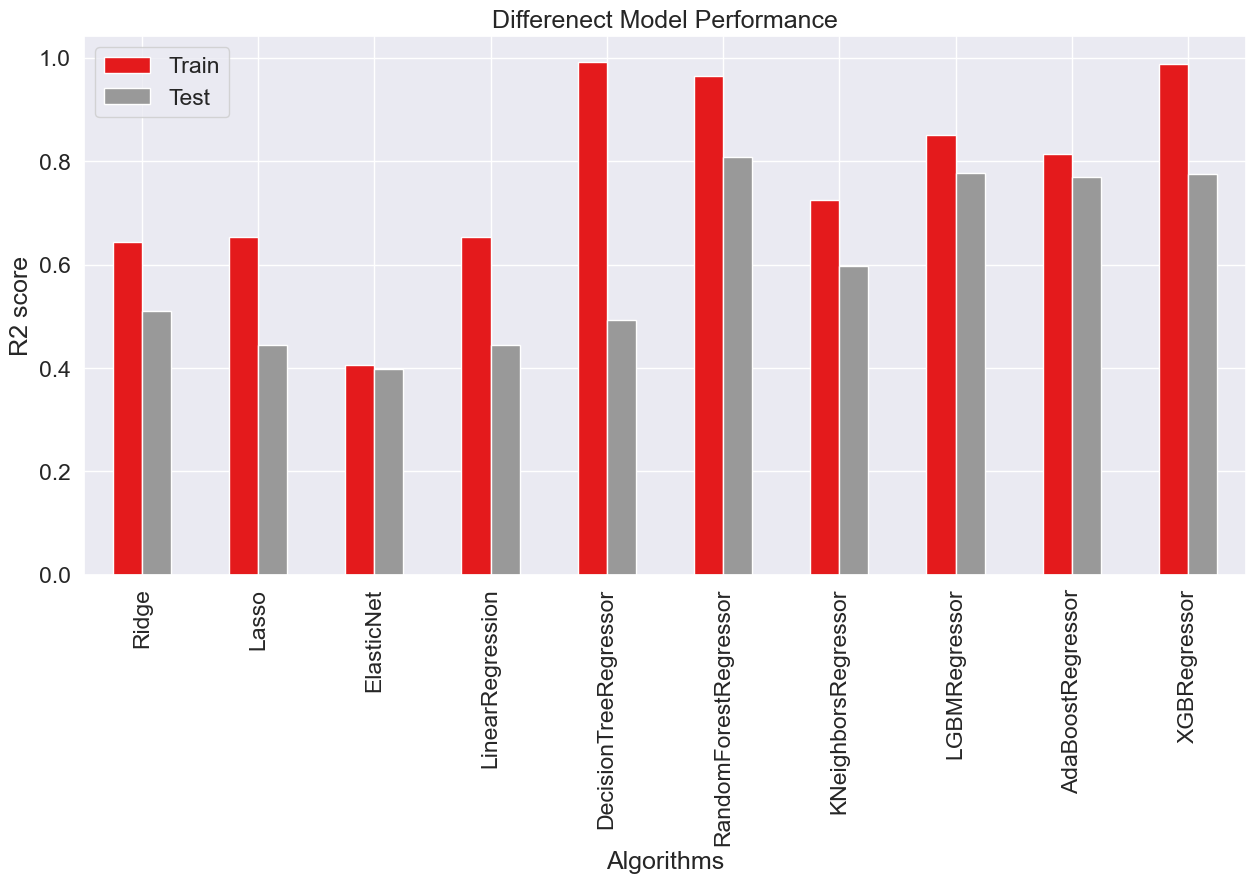

In [86]:
chart_df.plot(x='Algorithms', y = ['Train' , 'Test'] , kind="bar" , figsize=(15,7) ,title="Differenect Model Performance" , colormap="Set1")
plt.ylabel('R2 score')
plt.show()

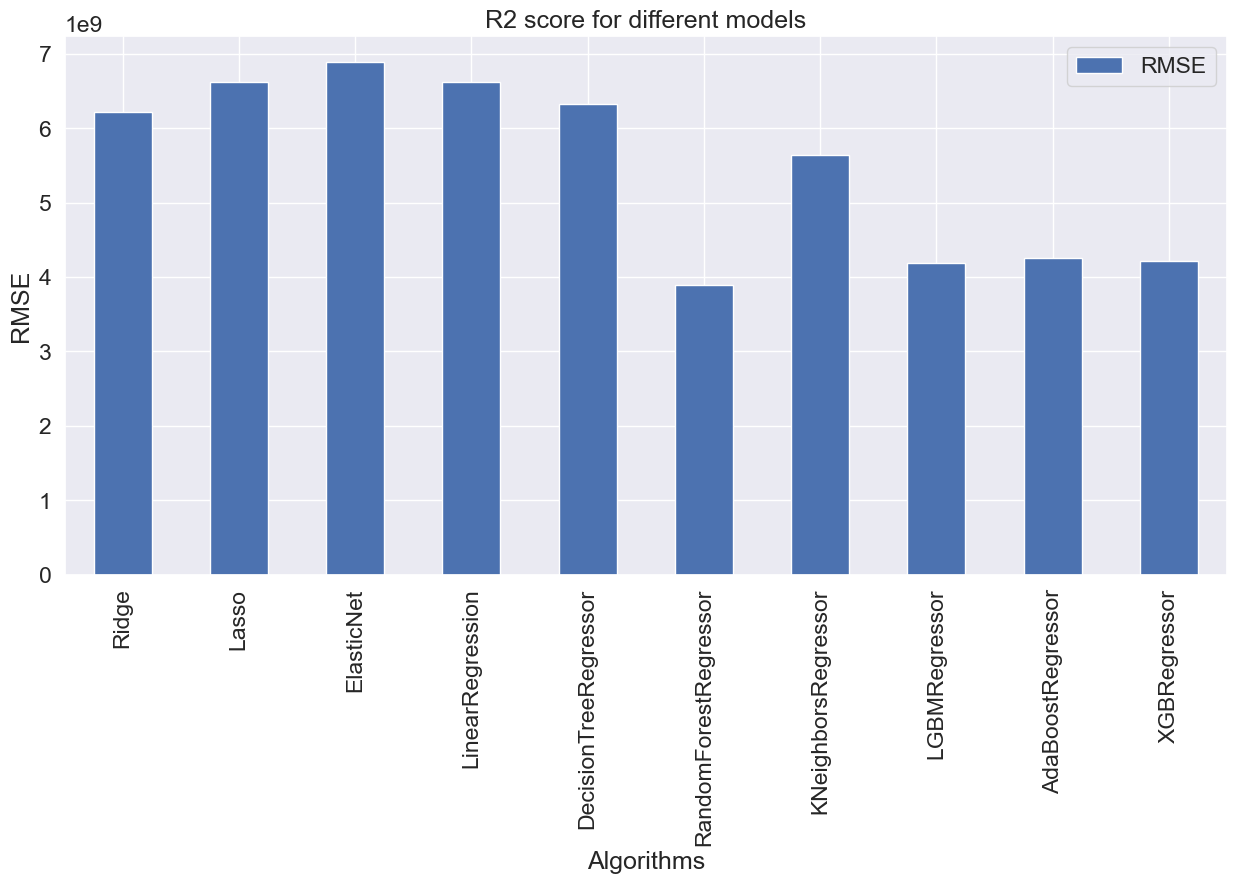

In [87]:
chart_df.plot(x='Algorithms', y = ['RMSE'] , kind="bar" , figsize=(15,7) ,title="R2 score for different models" )
plt.ylabel("RMSE")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

1: Among regularization , we can see Ridge have the best performance **(L2)**.<br>

2: LinearRegression has the worst performance .<br>

3: DecisionTree with spite the fact that has the best fitting but we can observe  huge overfiiting .<br>

4: RandomForest and XGBRegressor have roughly the same performance and both have good performance.<br>

5: KNeighborsRegressor has bad performance too .<br>

6: LGBMRegressor and AdaBoostRegressor have the same performance but LGBM has a little better performance.<br>

**Conclusion:**<br>

We are going to use the 3 best models for Hyper-Parameter Tunning (RandomForestRegressor,XGBResgressor,LGBMRegressor)

</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning  for the best models
</p>
</div>

In [88]:
Model_Name_Best = []
Train_Score_Best= []
Test_Score_Best = []
MSE_Score_Best  = []
RMSE_Score_Best = []
Time_Score_Best = []

In [89]:
def Model_Parameter_Prediction( model , parameter):
    
    Start_time = time.time()

    Grid_Search = GridSearchCV(estimator=model, param_grid=parameter ,scoring=None , n_jobs= -1 ,refit=True ,
    cv=KFold(n_splits=5 , shuffle=True , random_state=1))

    Grid_Fit = Grid_Search.fit(X_train , y_train)

    y_Prediction = Grid_Fit.predict(X_test)

    Train_score = Grid_Fit.score(X_train , y_train)
    Test_score = Grid_Fit.score(X_test , y_test)
    MSE_score = mean_squared_error(y_test , y_Prediction)
    RMSE_score = np.sqrt(MSE_score)
    Name = str(model).split('(')[0]
    Best_Parameter = Grid_Fit.best_params_
    
    End_time = time.time()

    Model_Name_Best.append(Name)
    Train_Score_Best.append(Train_score)
    Test_Score_Best.append(Test_score)
    MSE_Score_Best.append(MSE_score)
    RMSE_Score_Best.append(RMSE_score)
    Time_Score_Best.append(End_time)

    print(f'Name of model is : {Name}')
    print(f'The best parameters are : {Best_Parameter}')

    print('--'*25)
    print(f'R2 Score for Training is : {Train_score} ')
    print(f'R2 Score for Testing is : {Test_score} ')

    print('--'*25)
    print(f'MSE Score is : {MSE_score}')
    print(f'RMSE Score is : {RMSE_score}')

    print('--'*25)

    print(f"Process Time is : {round(End_time)}")

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1.  RandomForestRegressor </b> Hyper-Parameter Tunning</h2>

In [90]:
randomforest = RandomForestRegressor(random_state=1)
Parameters_forest = {
                    'n_estimators': [120,140,150],
                    # 'max_depth': [13,14,15],
                    # 'min_samples_split' :[1,2,3],
                    # 'min_samples_leaf':[1,2,3]
                    }
Model_Parameter_Prediction( randomforest , Parameters_forest)

Name of model is : RandomForestRegressor
The best parameters are : {'n_estimators': 140}
--------------------------------------------------
R2 Score for Training is : 0.9632971640337346 
R2 Score for Testing is : 0.8038431773666666 
--------------------------------------------------
MSE Score is : 1.5492658461455565e+19
RMSE Score is : 3936071450.2477674
--------------------------------------------------
Process Time is : 1684587692


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2.  XGBRegressor </b> Hyper-Parameter Tunning</h2>

In [91]:
xgbregression = XGBRegressor()
Parameters_xgbr={
                  'n_estimators':[10,11,12] ,
                # 'max_depth':[5,6,7,8],
                # 'learning_rate':[0.03 ,0.05 , 0.07],
                # 'colsample_bytree': [1],
                #  'subsample': [0.5 , 0.75 , 0.9],
                }
Model_Parameter_Prediction(xgbregression , Parameters_xgbr)

Name of model is : XGBRegressor
The best parameters are : {'n_estimators': 10}
--------------------------------------------------
R2 Score for Training is : 0.9289380781102097 
R2 Score for Testing is : 0.8266291137243065 
--------------------------------------------------
MSE Score is : 1.3693002834012772e+19
RMSE Score is : 3700405766.1306243
--------------------------------------------------
Process Time is : 1684587693


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. LGBMRegressor </b> Hyper-Parameter Tunning</h2>

In [92]:
lgbmregression = LGBMRegressor()
Parameters_lgbm={
                  'n_estimators':[200,250,300] ,
                # 'max_depth':[5,6,7,8],
                # 'learning_rate':[0.07 , 0.09 , 0.1]
                # 'colsample_bytree': [1]
                # 'subsample': [0.50 , 0.75 , 0.9],
                }
Model_Parameter_Prediction(lgbmregression , Parameters_lgbm)


Name of model is : LGBMRegressor
The best parameters are : {'n_estimators': 250}
--------------------------------------------------
R2 Score for Training is : 0.8855044359421032 
R2 Score for Testing is : 0.7813133948766965 
--------------------------------------------------
MSE Score is : 1.7272082804907764e+19
RMSE Score is : 4155969538.4961333
--------------------------------------------------
Process Time is : 1684587696


### Checking all the best models scores

In [93]:
chart_df_Best = pd.DataFrame({'Algorithms':Model_Name_Best,
            'Train':Train_Score_Best , 
            'Test':Test_Score_Best, 
            'MSE' :MSE_Score_Best,
            'RMSE':RMSE_Score_Best,
            'Time':Time_Score_Best })

In [94]:
chart_df_Best

,Algorithms,Train,Test,MSE,RMSE,Time
0,RandomForestRegressor,0.96329716,0.80384318,1.54926585e+19,3.93607145e+09,1.68458769e+09
1,XGBRegressor,0.92893808,0.82662911,1.36930028e+19,3.70040577e+09,1.68458769e+09
2,LGBMRegressor,0.88550444,0.78131339,1.72720828e+19,4.15596954e+09,1.68458770e+09


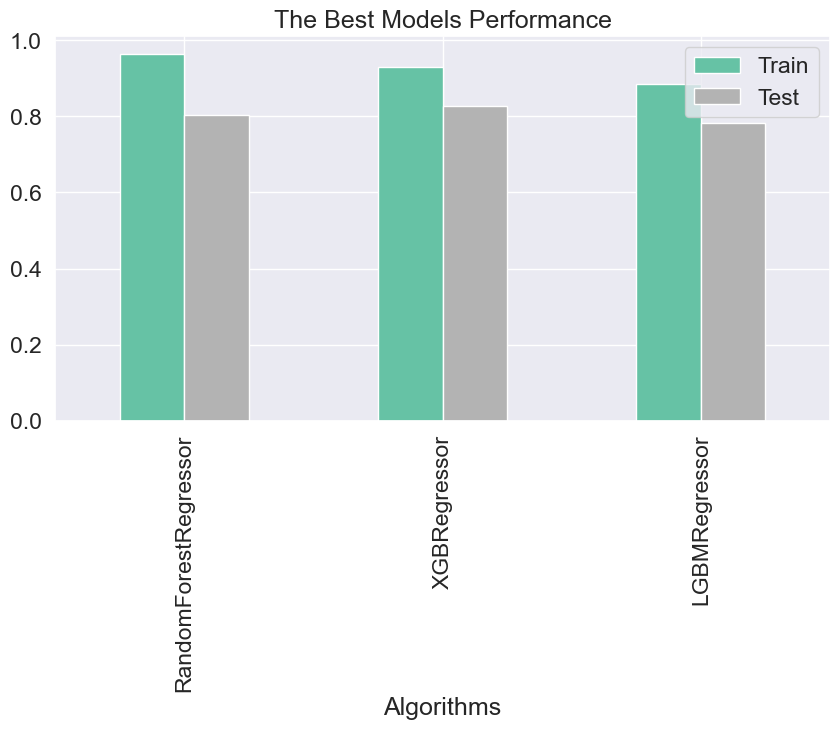

In [95]:
chart_df_Best.plot(x='Algorithms', y = ['Train' , 'Test'] , kind="bar" , figsize=(10,5) ,title="The Best Models Performance" , colormap="Set2")
plt.show()

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Description**<br>

RandomForest and XGB are the models with the highest performance and closely the same performance.<br>
But it can be seen that , overfitting is a little more seen in Randomforest.



</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Saving Model
</p>
</div>

In [96]:
# Model_Add = 'BestModel'
# joblib.dump(name, Model_Add)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Conclusion
</p>
</div>

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px  ; color:#034914">
    
**Summary**<br>

1: First,we checked quickly our dataset .<br>
2: Then ,EDA done to get some details about the dataset.<br>
3: FeatueEngeering to create some new relevent features. <br>
4: preprocessing to prepare our dataset for model building(with and without outliers).<br>
5: we done model building and checked the prefromance for each one.<br>
6: seen that Randomforest , XGB , LGBM have the best performance.<br>
7: done HyperParameter Tunning for the best models.<br>
8: last ,saved  model in case we need.<br>
</div>